In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open('true.json','r') as f:
    y=np.array(json.load(f))
with open('predicted.json','r') as f:
    yhat=np.array(json.load(f))

In [3]:
import sklearn.metrics as metrics

In [7]:
from pandas import DataFrame
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y, yhat)
confmat=metrics.confusion_matrix(y,yhat)
accuracy=np.diagonal(confmat/np.sum(confmat,axis=1))
class_labels = ['Blues','Classical','Country','Disco','HipHop','Jazz','Metal','Pop','Reggae','Rock']


C:\Users\emanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
metrics_df = DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': fscore,
    'Support': support
}, index=class_labels)
metrics_df.loc['Average'] = metrics_df.mean()
print(metrics_df)

           Accuracy  Precision  Recall  F1 Score  Support
Blues         0.000   0.000000   0.000  0.000000     99.0
Classical     0.820   0.863158   0.820  0.841026    100.0
Country       1.000   0.182149   1.000  0.308166    100.0
Disco         0.010   1.000000   0.010  0.019802    100.0
HipHop        0.080   1.000000   0.080  0.148148    100.0
Jazz          0.000   0.000000   0.000  0.000000    100.0
Metal         0.090   1.000000   0.090  0.165138    100.0
Pop           0.020   1.000000   0.020  0.039216    100.0
Reggae        0.590   0.176119   0.590  0.271264    100.0
Rock          0.000   0.000000   0.000  0.000000    100.0
Average       0.261   0.522143   0.261  0.179276     99.9


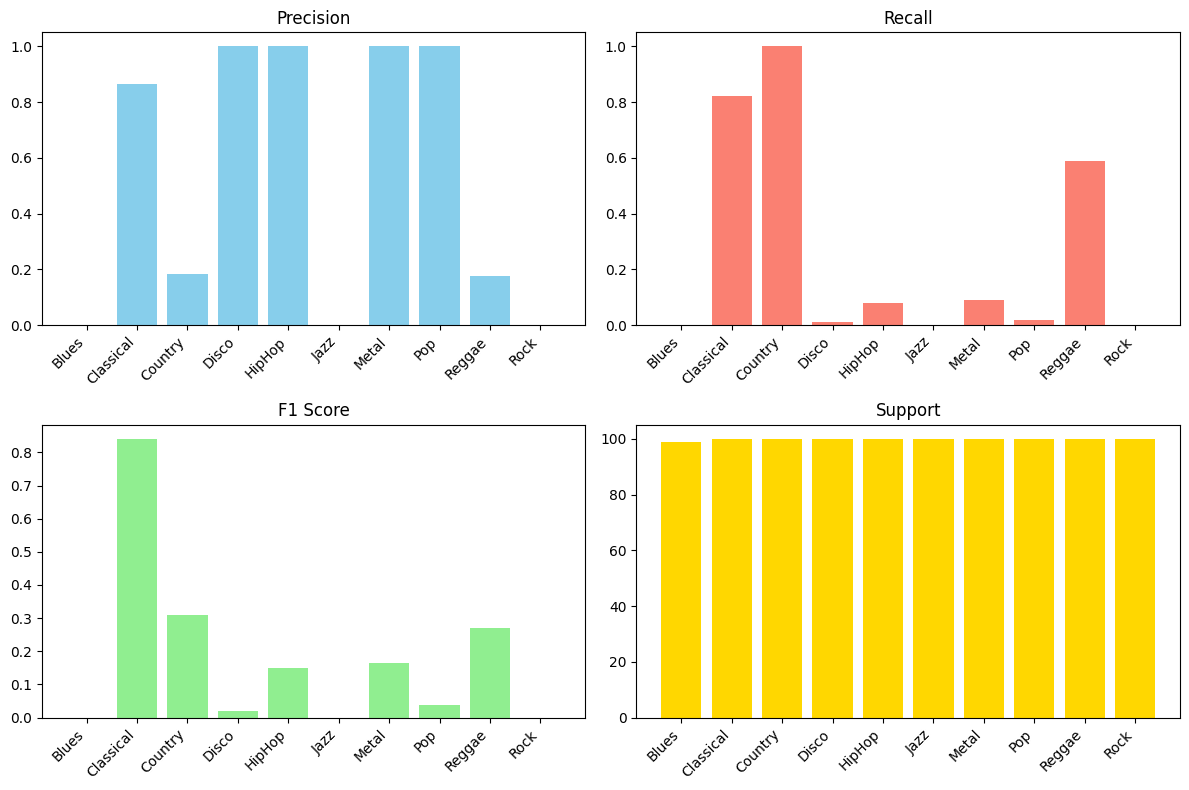

In [8]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Precision
ax[0, 0].bar(np.arange(len(class_labels)), precision, color='skyblue')
ax[0, 0].set_title('Precision')
ax[0, 0].set_xticks(np.arange(len(class_labels)))
ax[0, 0].set_xticklabels(class_labels, rotation=45, ha='right')

# Recall
ax[0, 1].bar(np.arange(len(class_labels)), recall, color='salmon')
ax[0, 1].set_title('Recall')
ax[0, 1].set_xticks(np.arange(len(class_labels)))
ax[0, 1].set_xticklabels(class_labels, rotation=45, ha='right')

# F1 Score
ax[1, 0].bar(np.arange(len(class_labels)), fscore, color='lightgreen')
ax[1, 0].set_title('F1 Score')
ax[1, 0].set_xticks(np.arange(len(class_labels)))
ax[1, 0].set_xticklabels(class_labels, rotation=45, ha='right')

# Support
ax[1, 1].bar(np.arange(len(class_labels)), support, color='gold')
ax[1, 1].set_title('Support')
ax[1, 1].set_xticks(np.arange(len(class_labels)))
ax[1, 1].set_xticklabels(class_labels, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

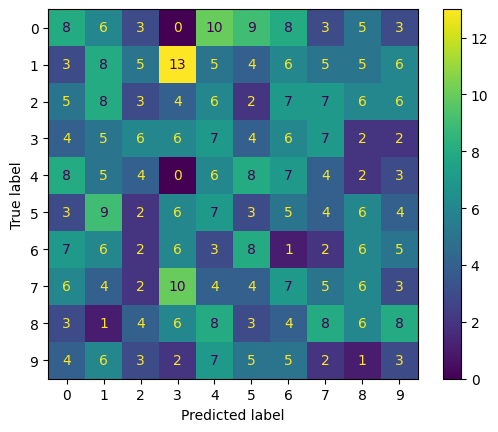

In [38]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confmat)
disp.plot()
plt.show()